## Excel to report

In [6]:
# read file path
import os
import datetime
import pandas as pd

today = datetime.date.today()
year = today.year-1

path = os.getcwd() + "\data\sales_data" # change to my floder name

xlxs_file_lists = []

for root,dirs,files in os.walk(path):
      for name in files:
        file_path = os.path.join(root,name)
        #print(file_path.split("\\")[-2])
        if file_path.split("\\")[-2] == str(year): #change filter
            xlxs_file_lists.append(file_path)
xlxs_file_lists

['d:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\April.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\August.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\December.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\February.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\January.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\July.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\June.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\March.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\May.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\November.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\src\\data\\sales_data\\2022\\October.xlsx',
 'd:\\My Documents\\Desktop\\python_office\\

In [7]:
#export to dataframe
dfs = []
for f in xlxs_file_lists:
  #print(f.split("\\")[-1])
  df = pd.read_excel(f)
  df["file_name"] = f.split("\\")[-1]
  df["year"] = file_path.split("\\")[-2]
  df["amount_10x"] = df["amount"]*10
  dfs.append(df)
dfs

[     transaction_id          store  status transaction_date    plan  \
 0          7fb801a5        Chicago  ACTIVE       2019-04-01  Silver   
 1          8e8bdb2a  San Francisco  ACTIVE       2019-04-01  Silver   
 2          239db9b6  Washington DC  ACTIVE       2019-04-01  Silver   
 3          7ccb13ab  San Francisco  ACTIVE       2019-04-01    Gold   
 4          c18e82d9        Chicago  ACTIVE       2019-04-01  Bronze   
 ...             ...            ...     ...              ...     ...   
 7428       b3fcd96c         Boston  ACTIVE       2019-04-30  Bronze   
 7429       eec9e52a  San Francisco  ACTIVE       2019-04-30  Silver   
 7430       a9c90deb       New York  ACTIVE       2019-04-30  Bronze   
 7431       d585c5c1       New York  ACTIVE       2019-04-30  Silver   
 7432       f30b34e7  San Francisco  ACTIVE       2019-04-30  Silver   
 
      contract_type  amount   file_name  year  amount_10x  
 0              NEW   14.25  April.xlsx  2022       142.5  
 1            

In [8]:
dfs_summary = pd.concat(dfs)

In [9]:
dfs_summary

,transaction_id,store,status,transaction_date,plan,contract_type,amount,file_name,year,amount_10x
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,April.xlsx,2022,193.5
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,April.xlsx,2022,122.0
...,...,...,...,...,...,...,...,...,...,...
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5


In [10]:
dfs_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93583 entries, 0 to 7351
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    93583 non-null  object        
 1   store             93583 non-null  object        
 2   status            93583 non-null  object        
 3   transaction_date  93583 non-null  datetime64[ns]
 4   plan              93583 non-null  object        
 5   contract_type     93583 non-null  object        
 6   amount            93583 non-null  float64       
 7   file_name         93583 non-null  object        
 8   year              93583 non-null  object        
 9   amount_10x        93583 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 7.9+ MB


In [11]:
dfs_summary.nunique()

transaction_id      93583
store                   6
status                  1
transaction_date      261
plan                    3
contract_type           1
amount                  3
file_name              12
year                    1
amount_10x              3
dtype: int64

In [12]:
dfs_summary["plan"].unique()

array(['Silver', 'Gold', 'Bronze'], dtype=object)

In [13]:
dfs_summary.describe()

,transaction_date,amount,amount_10x
count,93583,93583.000000,93583.000000
mean,2019-06-26 00:06:29.609224192,14.649552,146.495523
min,2019-01-01 00:00:00,12.200000,122.000000
25%,2019-03-22 00:00:00,12.200000,122.000000
50%,2019-06-24 00:00:00,14.250000,142.500000
75%,2019-09-24 00:00:00,14.250000,142.500000
max,2019-12-31 00:00:00,19.350000,193.500000
std,NaN,2.507045,25.070450


In [14]:
dfs_summary.head(5)

,transaction_id,store,status,transaction_date,plan,contract_type,amount,file_name,year,amount_10x
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,April.xlsx,2022,193.5
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,April.xlsx,2022,122.0


In [15]:
dfs_summary.tail(5)

,transaction_id,store,status,transaction_date,plan,contract_type,amount,file_name,year,amount_10x
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7351,86937799,Chicago,ACTIVE,2019-09-30,Gold,NEW,19.35,September.xlsx,2022,193.5


In [16]:
dfs_summary

,transaction_id,store,status,transaction_date,plan,contract_type,amount,file_name,year,amount_10x
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,April.xlsx,2022,142.5
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,April.xlsx,2022,193.5
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,April.xlsx,2022,122.0
...,...,...,...,...,...,...,...,...,...,...
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,September.xlsx,2022,142.5


In [17]:
pivot = pd.pivot_table(dfs_summary,index="transaction_date",columns="store",values="amount",aggfunc="sum")
pivot

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
transaction_date,,,,,,
2019-01-01,465.15,1277.25,269.70,1740.25,1739.20,355.15
2019-01-02,621.80,1177.50,369.45,1833.85,1861.45,326.70
2019-01-03,449.85,1204.95,302.25,1614.05,1736.20,286.95
2019-01-04,600.45,1165.25,340.95,1712.95,1763.75,204.55
2019-01-07,599.40,1197.80,395.90,1427.70,1967.20,265.65
...,...,...,...,...,...,...
2019-12-25,499.75,894.55,282.95,1480.95,1575.40,224.85
2019-12-26,382.65,971.85,298.25,1260.90,1427.75,193.35
2019-12-27,525.20,821.30,262.55,1429.75,1758.45,209.60


In [18]:
summary_monthly = pivot.resample("M").sum()
summary_monthly

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
transaction_date,,,,,,
2019-01-31,13701.10,26272.65,7216.45,42128.25,42969.25,6515.40
2019-02-28,12243.85,24739.90,6192.60,37926.55,36469.35,6705.70
2019-03-31,11026.60,22131.00,5637.25,32805.60,33876.45,5173.80
2019-04-30,10344.80,21489.35,5540.40,32954.35,33265.00,5480.30
2019-05-31,10533.15,20606.55,5266.45,32348.55,31836.80,5293.95
2019-06-30,13317.90,24328.15,5713.55,38543.65,37787.30,5926.05
2019-07-31,10701.65,20877.90,5376.65,31547.60,31386.65,4982.55
2019-08-31,12239.70,24662.75,6335.05,36491.60,36895.10,6729.15
2019-09-30,10757.10,20964.35,5928.55,33226.20,31709.80,5544.45


In [19]:
#!pip install matplotlib
import matplotlib

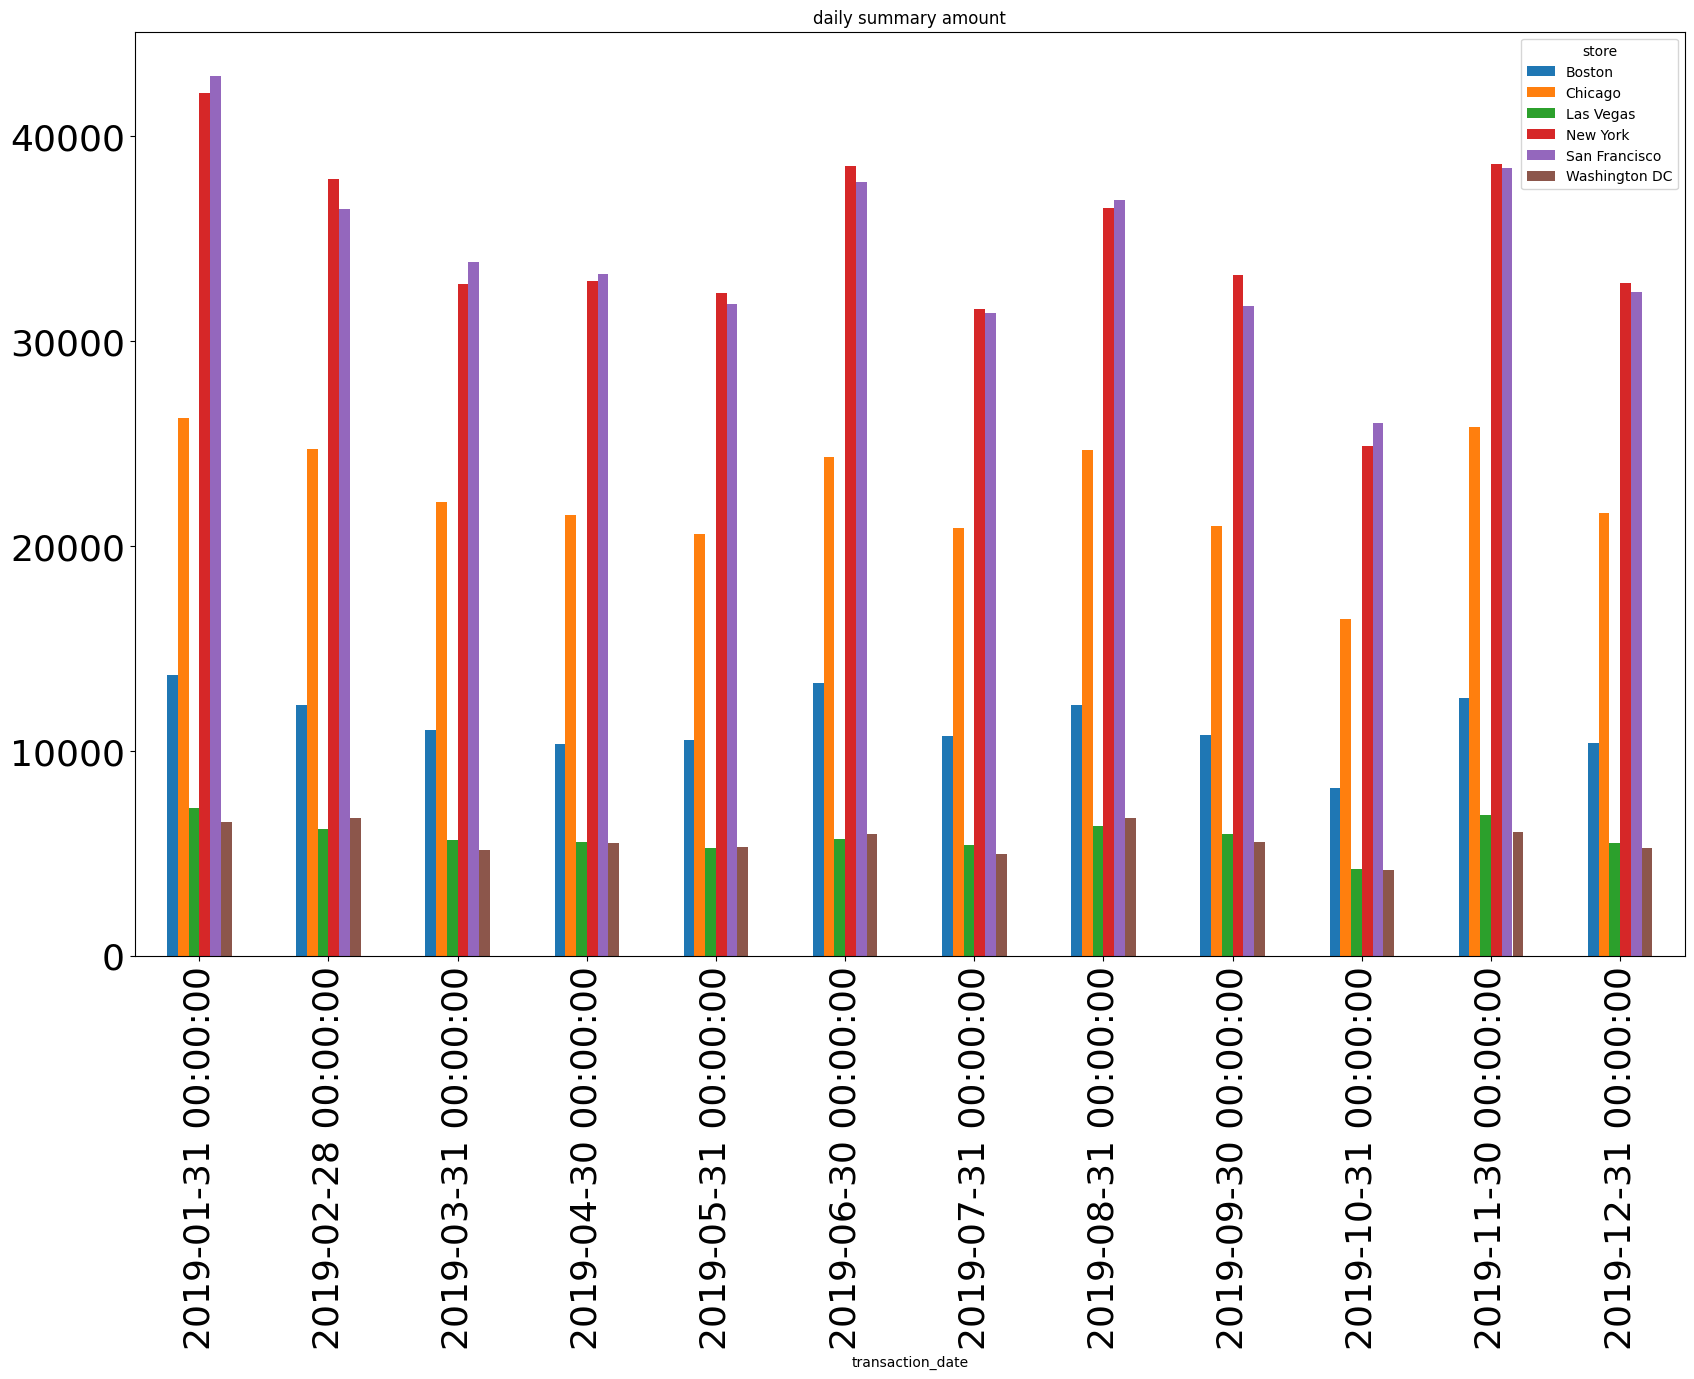

In [20]:
fig = summary_monthly.plot(kind="bar",figsize=(20,12),fontsize=26,title="daily summary amount").get_figure()

xlwings for excel

In [21]:
#!pip install xlwings

In [22]:
import xlwings as xw

In [23]:
import xlwings as xw

import datetime
now = datetime.datetime.now()
date_file_name = f'{str(now.date())}_{str(now.time()).split(".")[0].replace(":","_")}'


template = xw.Book(r"D:\My Documents\Desktop\python_office\src\data\sale_template.xlsx")

app = xw.apps.active
sheet = template.sheets["summary"]
sheet["A1"].value = summary_monthly

pivote = template.sheets["pivot"]
pivote["A1"].value = pivot

#add picture
sheet_report = template.sheets["report"]
sheet_report["A1"].value = "Summary by month"
sheet_report['A1'].font.size = 24
sheet_report["A1"].api.Font.Bold = True
plot= sheet_report.pictures.add(fig,top=sheet["A3"].top,left=sheet["A3"].left)
plot.width = plot.width*0.8
plot.height = plot.height*0.8

template.save(f"export\summary_sale_report_{date_file_name}.xlsx")
template.close()
app.kill()

#### script node-red
conda activate python_office && python "D:\My Documents\Desktop\python_office\src\sale_report_script.py"

#### install pm2
- npm install -g pm2 
- pm2 status
- pm2 start C:\Users\<User>\AppData\Roaming\npm\node_modules\node-red\red.js
- pm2 start C:\Users\lbj6639\AppData\Roaming\npm\node_modules\node-red\red.js
- npm install pm2-windows-startup -g
- pm2-startup install
- pm2 save

#### send email

In [24]:
#!pip install email

In [35]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
from email.mime.text import MIMEText

send_from = 'devops.mic@gmail.com'
#send_to = 'devops.mic@gmail.com'
send_to = ['suraphop.b@minebea.co.th','devops.mic@gmail.com']
subject = "quiz report"
text = f'''<html>
	<head>Dear sir</head>
	<body><div>I would like to report....</div></body>
</html>

'''

files = f"export\summary_sale_report_{date_file_name}.xlsx"
file_name_1 = f"summary_sale_report_{date_file_name}.xlsx"


username = 'devops.mic@gmail.com'
password = ''

msg = MIMEMultipart()
msg['Subject'] = subject 
msg['From'] = send_from
msg['To'] = ', '.join(send_to)

msg.attach(MIMEText(text,'html'))

part = MIMEBase('application', "octet-stream")

with open(files, 'rb') as f:
    file = f.read()
part.set_payload(file)
encoders.encode_base64(part)    
part.add_header('Content-Disposition', f'attachment; filename="{file_name_1}"')
msg.attach(part)


server = smtplib.SMTP("smtp.gmail.com", 587)
server.ehlo()
server.starttls()
server.login(username, password)
server.sendmail(send_from,send_to, msg.as_string())

{}